In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
with open('final_result.json') as f:
    json_file = json.load(f)


In [2]:
missing_data = 14296-len(json_file)
print("Missing data: ", missing_data)

Missing data:  282


In [3]:
for repo_url in json_file:
    if type(json_file[repo_url]) == str:
        print(json_file[repo_url])
    break    

In [4]:
missing_data = 0

sample = [] 

for repo_url in json_file:
  if not  type(json_file[repo_url]) == str: 
    for meta in json_file[repo_url]: 
      if meta not in sample: 
        sample.append(meta)
  else:
    missing_data += 1
    
noise = [ 
  'model_name',
'model_type',
'model_card',
'duplicated_from',
'library_tag',
'tags',
'library_name',
'original',
'pipeline_tag',
'pipeline',
'model_usage',
'metrics',
'widget',
'inference',
'framework_versions',
'description'
]



# Remove all noise from samples 
for i in range(len(sample)): 
  if sample[i] in noise: 
    sample[i] = None

sample = [x for x in sample if x is not None]

popular_meta = sample 

In [8]:
missing_data, missing_data/len(json_file)

(2321, 0.16562009419152277)

In [6]:
TOTAL = len(json_file) - missing_data
# TOTAL = len(json_file)

[98.85, 98.74, 98.73, 83.58, 78.01, 74.41, 73.48, 70.56, 58.69, 58.6, 52.77, 48.03, 33.24, 30.11, 29.39, 22.67, 18.16, 18.1, 7.81, 4.8]


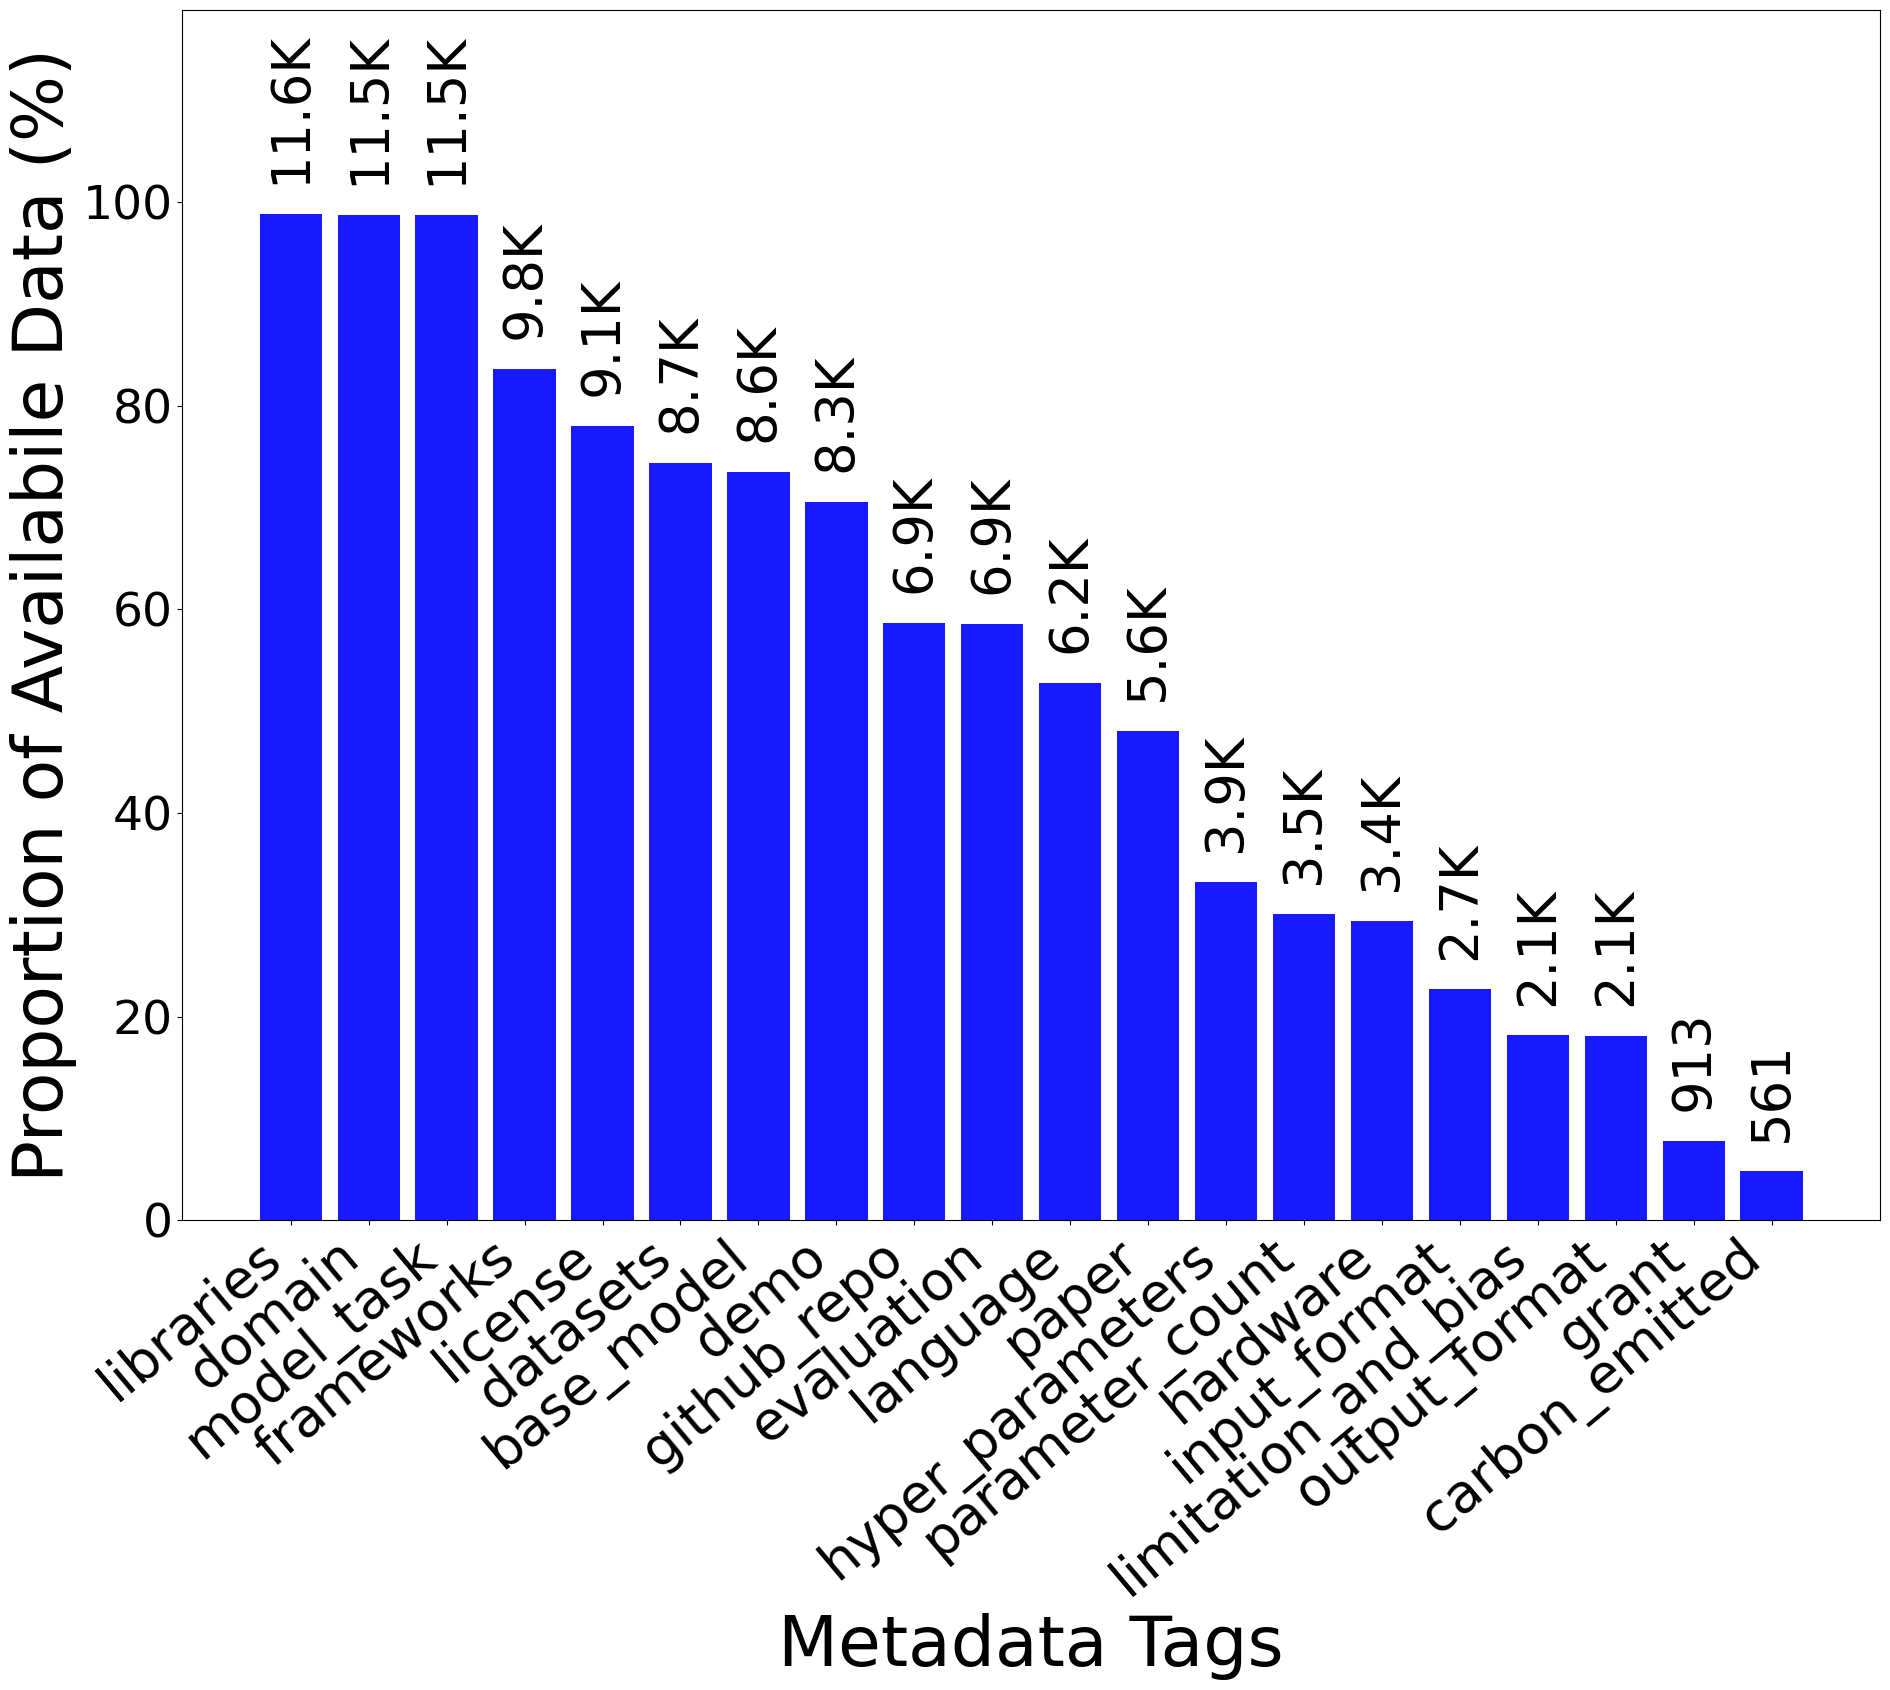

In [7]:
cat_meta_count = {key: 0 for key in popular_meta} 


for model in json_file: 
  for meta in json_file[model]: 
    if meta in popular_meta:
      if json_file[model][meta]:
        cat_meta_count[meta] += 1

    
sorted_cat_meta_count = {k: round((v/TOTAL) * 100, 2) for k, v in sorted(cat_meta_count.items(), key=lambda item: item[1], reverse=True)} 


tags, freq = [x for x in sorted_cat_meta_count], [sorted_cat_meta_count[x] for x in sorted_cat_meta_count]
print(freq)
# Create a bar chart
plt.figure(figsize=(19, 17))  # Adjust the figure size as needed
plt.bar(tags, freq, color='blue', alpha=0.9)
plt.bar(tags, [100-x for x in freq], color='white', alpha=0.8, bottom=freq)

max_freq = max(freq)
y_limit = max_freq + 20  # Increase 10% or a value that accommodates your data labels

plt.ylim(0, y_limit) 

for i in range(len(tags)): 
  text1 = (freq[i]/100) * TOTAL
  if text1 > 1000: 
    text1 = str(round((text1 / 1000), 1)) + 'K'
  else: 
    text1 = str(round(text1))
  plt.text(i, freq[i] + 4, text1, ha = 'center', fontsize = 38, rotation=90)
plt.xlabel('Metadata Tags', fontsize=50)
plt.ylabel('Proportion of Availabile Data (%)', fontsize=50)
plt.yticks(fontsize=34)
plt.xticks(rotation = 40, fontsize=39, ha='right')
plt.tight_layout()  # Adjust layout to fit the labels
plt.savefig('./fig7.pdf') 